List of keyboard shortcuts:
1. "Ctrl-Enter" - Run a cell
2. "Shift-Enter" - Run a cell and go to the next cell
3. "Enter" - Start editing cell
4. "Escape" - Stop editing cell
5. "x" - delete current cell
6. "a" - create a new cell above
7. "b" - create a new cell below

**Make sure you run every cell when you first load this file.**

**If you change a value in a cell, you need to run it for the effect to take place.**

**If the computation is taking too long, you can interupt the computation in the Kernel menu above.**

In [1]:
from IPython.display import clear_output
x,y = var('x y')

The cell below generates a random set of points in the range $-5\leq x \leq 5$. 

In [2]:
#------Generate random Data-----------
sigma = 2
T = RealDistribution('gaussian', sigma)
S = RealDistribution('uniform', [-5,5])
A,B,C= 10,2,3
data=[]
for i in range(50):
    x= S.get_random_element()
    y= A + B* x+ C* x **2 + 5 * T.get_random_element()
    data.append([x,y])

Once you ran this code with the random input from above, go to http://math.jhu.edu/~vzakharevich/teaching/fall2020/data.php and insert the result in the cell below. The data will be in the range $-15 \leq x \leq 15 $. You will probably need to decrease the step size in order for it to work. Also, don't forget to change the $x$ bounds when you are graphing your result at the bottom of the page

In [3]:
#---------Insert data from http://math.jhu.edu/~vzakharevich/teaching/fall2020/data.php -------
#data=[]

/usr/lib/python3/dist-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/usr/lib/python3/dist-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


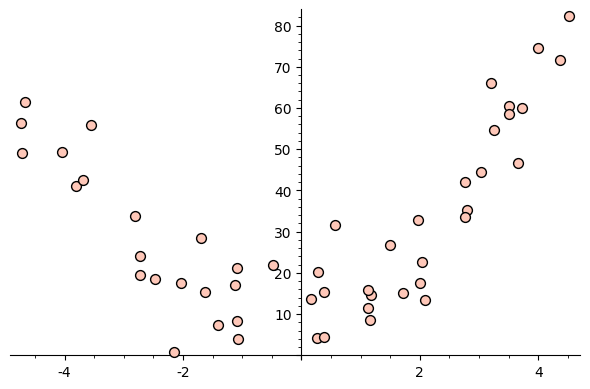

In [4]:
#--------Plot Data--------------
scatter_plot(data)

In [5]:
#--------- Define the functions used in the gradient descent--------
a,b,c,x,y = var('a b c x y')
SE(a,b,c,x,y)= (a+ b * x  + c * x **2 -y)**2 #Square error function
MSE(a,b,c)= sum([ SE(a,b,c,x,y) for x,y in data])/len(data) #Mean square error function
diff(a,b,c,x,y)= (a+ b * x  + c * x **2 -y) # Function used in the definition of the negative gradient of MSE
def neg_grad(a,b,c): #The negative gradient of the mean square error function
    return vector((-2 * sum([ diff(a,b,c,x,y) for x,y in data])/len(data), -2 * sum([ diff(a,b,c,x,y)* x for x,y in data])/len(data), -2 * sum([ diff(a,b,c,x,y)* x ** 2 for x,y in data])/len(data)))

**When you run the algorithm below, the value of the mean square difference should be decreasing. That is the function which we are trying to minimize. If it is not decreasing, you should decrease the step size of the algorithm**

In [6]:
#-------------Running the algorithm-----------
delta_t = 0.005 # Change this value to adjust the step size
starting_point= vector((0,0,0)) # Change this value to adjust the starting point
number_of_iterations = 1000  #Change this value to adjust the number of iteration of the algorithm

c=[starting_point]
for i in range(number_of_iterations):
    new_point= c[i] + delta_t * neg_grad(*tuple(c[i]))
    c.append(new_point)
    clear_output(wait=True)
    print("The value of the mean square difference at the current step %d is %f: "% (i+1, MSE(*c[i])))
print ("The predicted function is f(x)=%.4f + %.4f x + %.4f x^2 " % (c[number_of_iterations-1][0], c[number_of_iterations-1][1], c[number_of_iterations-1][2]))
prediction=c[number_of_iterations]
predicted_function(x)= prediction[0]+ prediction[1]*x+ prediction[2]* x**2

The value of the mean square difference at the current step 1000 is 67.159234: 
The predicted function is f(x)=10.9316 + 2.5943 x + 2.8174 x^2 


/usr/lib/python3/dist-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/usr/lib/python3/dist-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


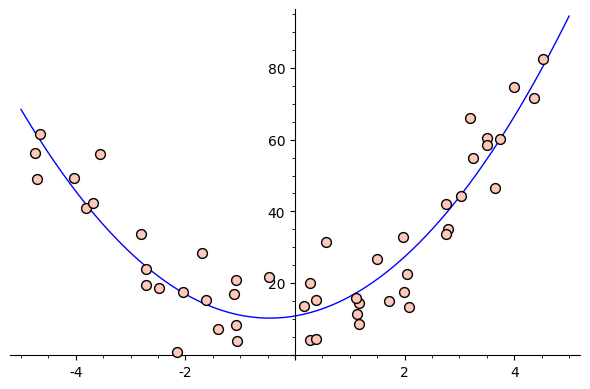

In [7]:
#-------------Plot the predicted function next to the data points--------
x_bounds= (x,-5, 5)
scatter_plot(data)+plot(predicted_function, x_bounds)